In [1]:
import numpy as np
from numba import jit
from numpy.random import default_rng as rg
rng = rg(12345)
from tqdm import tqdm
import sys
sys.path.append('../core')
%matplotlib inline

In [2]:
import torch
torch.manual_seed(0)
import torch.optim as optim

In [3]:
from FLDojo import dojo
from FL import FL
from display2 import*

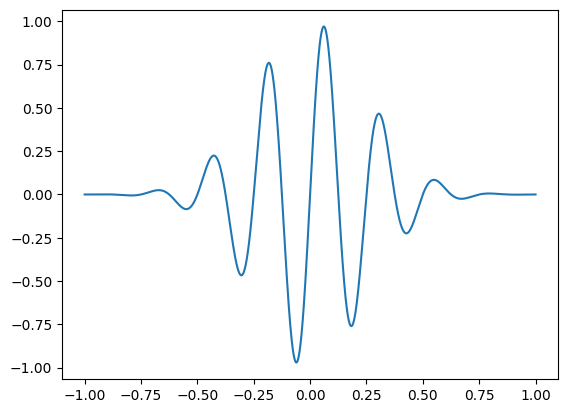

In [4]:
Xs = np.linspace(-1,1,40000)
Ys = np.sin(Xs*8*np.pi)*np.exp(-8*Xs**2)
from matplotlib import pyplot as plt
plt.plot(Xs,Ys)
# a three layer nn can represent any multivariate function (continuous or discontinuous) https://arxiv.org/abs/2012.03016


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
p = np.random.permutation(len(Xs))
Xs = Xs[p]
Ys = Ys[p]
X = torch.from_numpy(Xs).float().unsqueeze(1).to(device)
y = torch.from_numpy(Ys).float().unsqueeze(1).to(device)
split = 0.75
train_X = X[:int(split*len(X))]
train_y = y[:int(split*len(y))]
test_X = X[int(split*len(X)):]
test_y = y[int(split*len(y)):]

In [6]:
D = dojo()
D.epochs=10000
D.max_batch_size=train_X.shape[0]
opt = lambda x: optim.Adam(x, lr=0.00001) # Adam better than SGD and AdamW in quick tests.

100%|██████████| 10000/10000 [08:56<00:00, 18.63it/s]


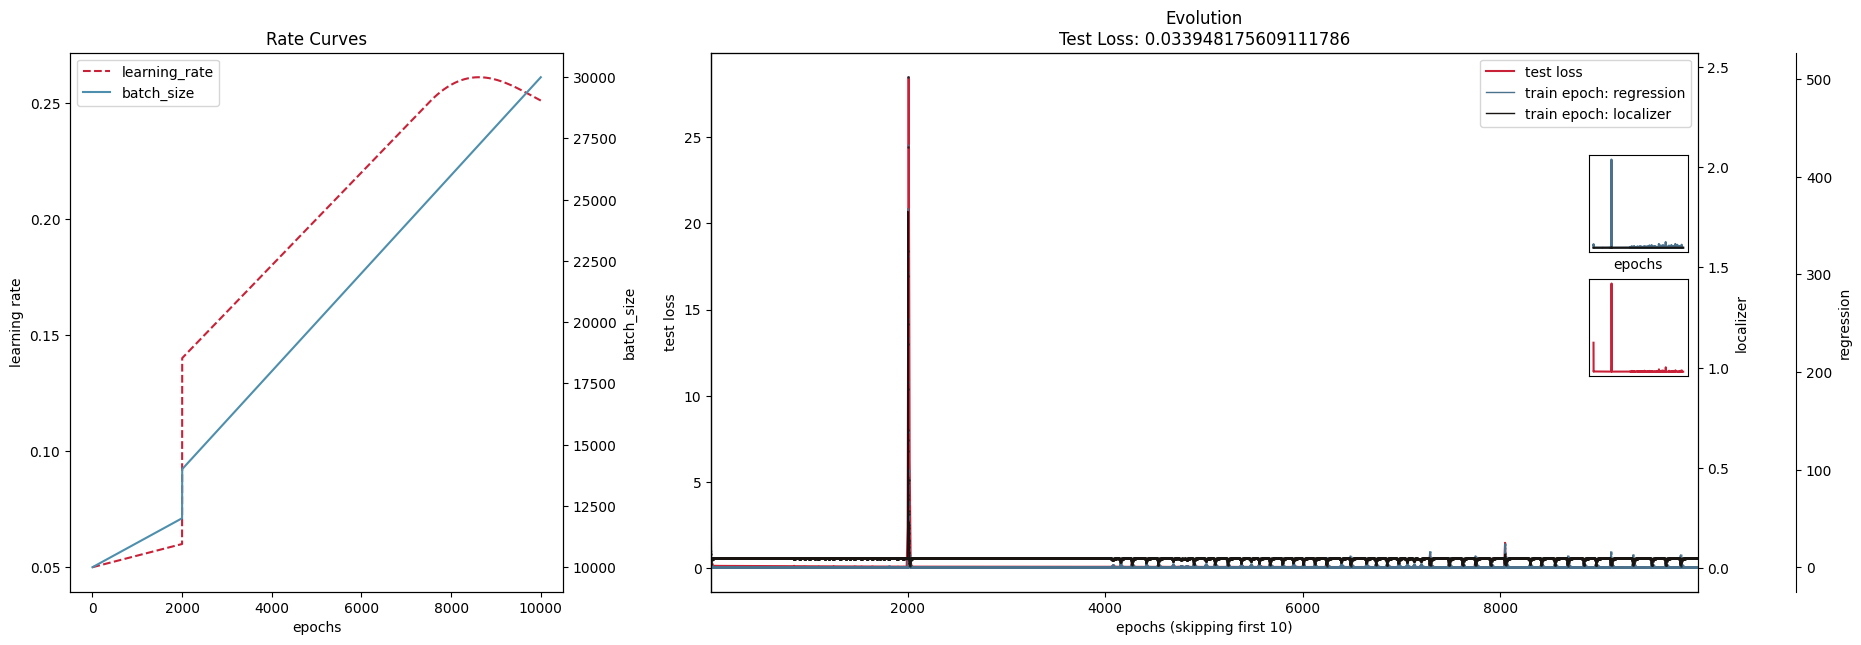

In [78]:
sizes = [1, 200, 200]
delta = np.array([1]*len(sizes))*0.05
k = [0.5]*len(sizes)

act = [torch.nn.ReLU(),lambda x: torch.sin(x)]

net = FL(device, sizes, delta, k, opttype=opt, act = act, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X, test_y, start_batch_size=10000, minibatch=0.5)
ecran(net, test_X, test_y, report, classification=False)

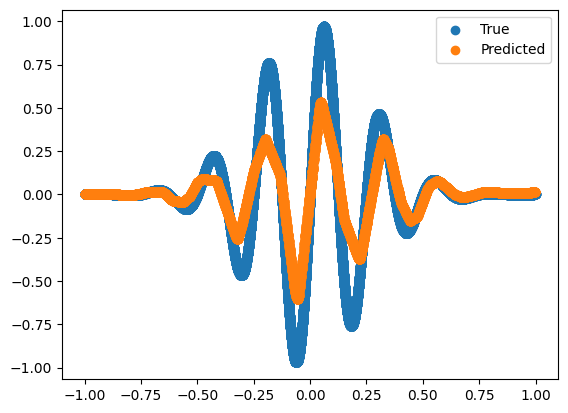

In [79]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.legend()
plt.show()

100%|██████████| 10000/10000 [09:00<00:00, 18.51it/s]


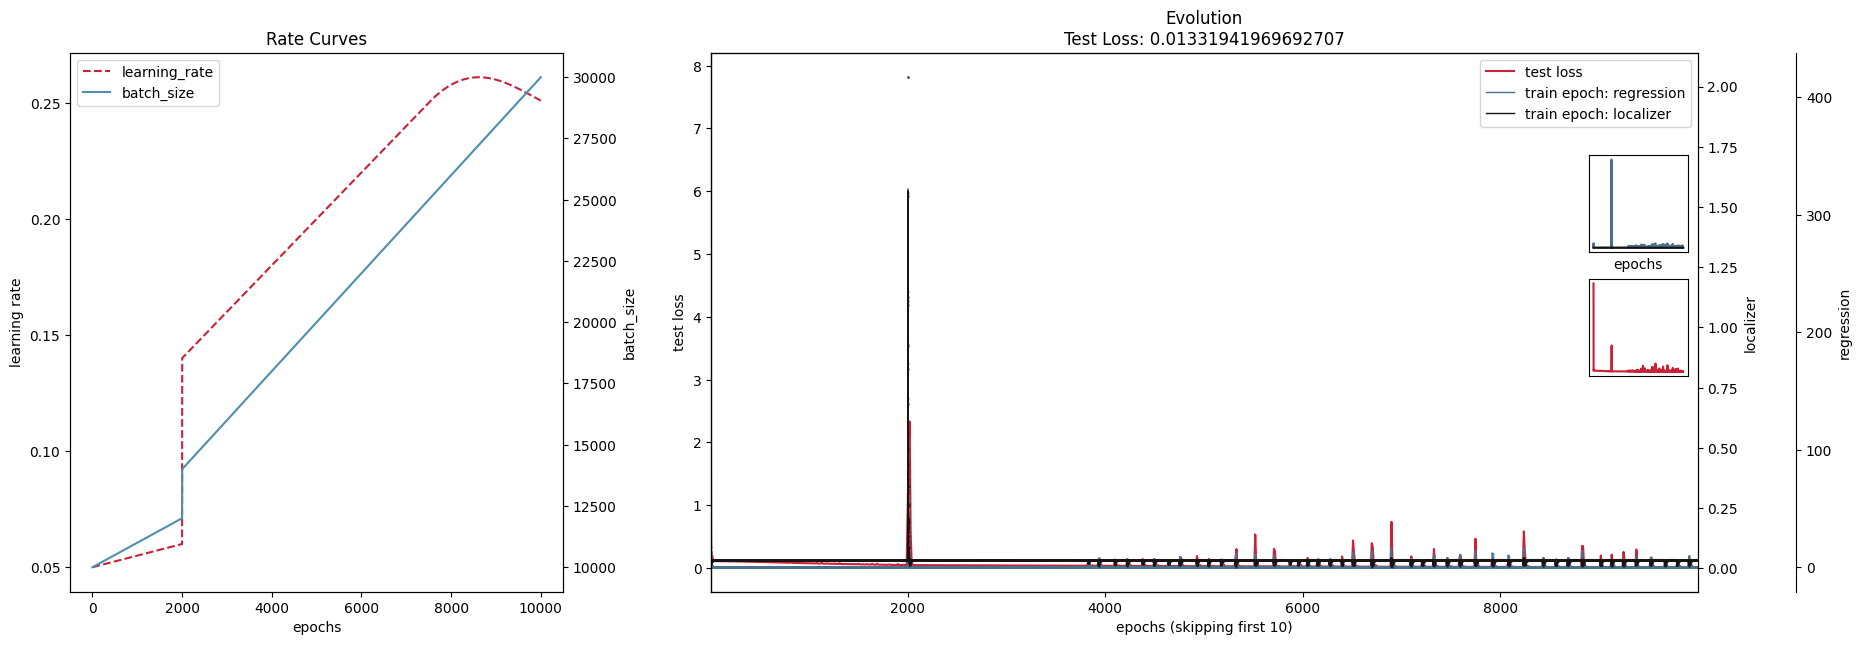

In [80]:
sizes = [1, 200, 200]
delta = np.array([1]*len(sizes))*0.02
k = [0.9]*len(sizes)

act = [torch.nn.ReLU(),lambda x: torch.sin(x)]

net = FL(device, sizes, delta, k, opttype=opt, act = act, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X, test_y, start_batch_size=10000, minibatch=0.5)
ecran(net, test_X, test_y, report, classification=False)

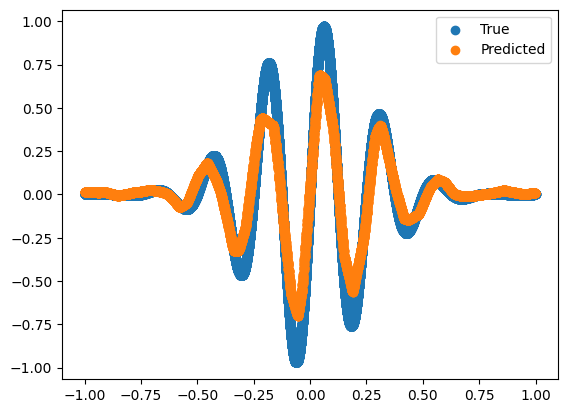

In [81]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.legend()
plt.show()

100%|██████████| 10000/10000 [09:41<00:00, 17.20it/s]


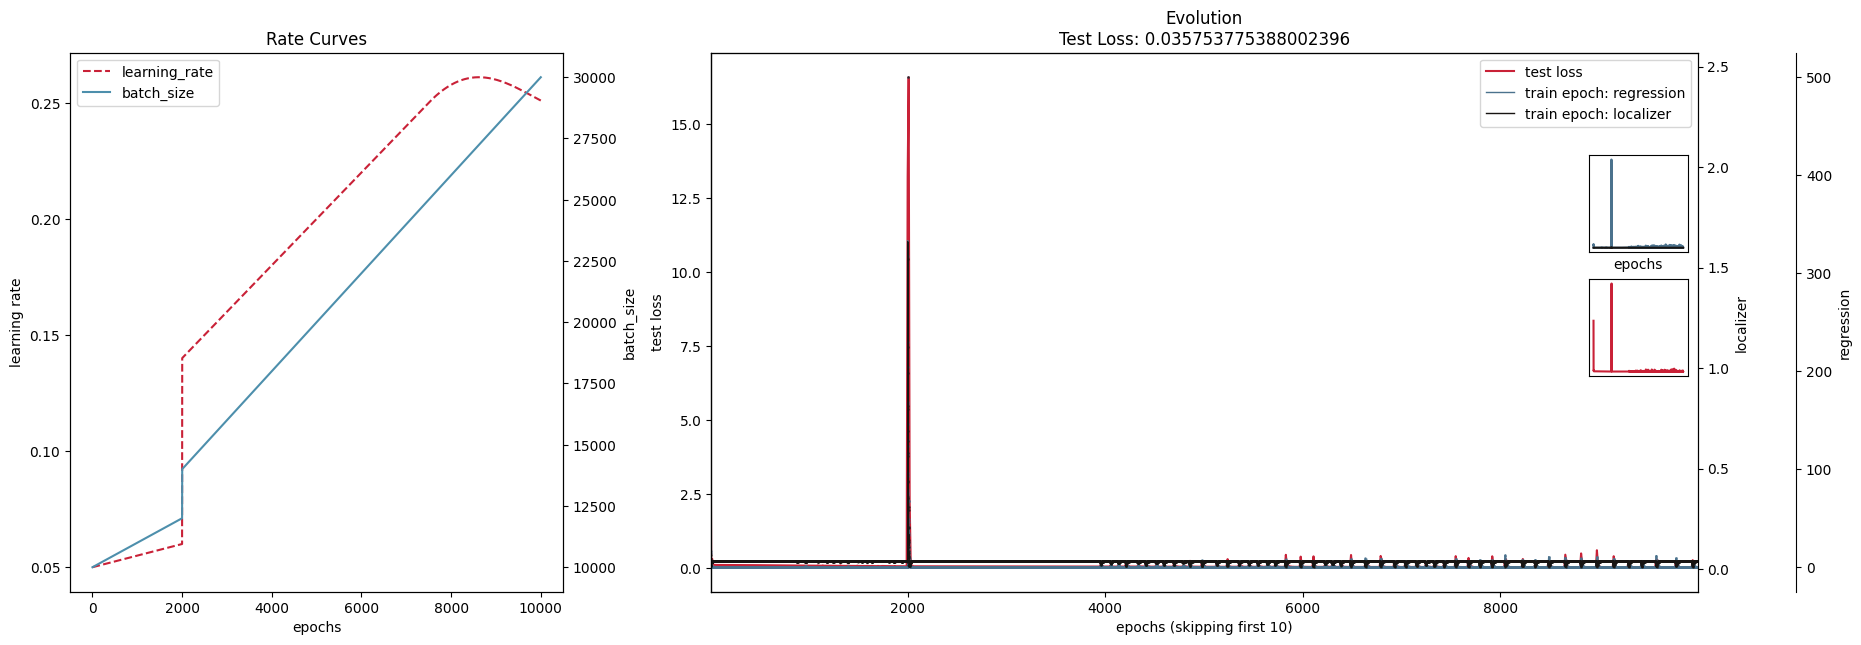

In [82]:
sizes = [1, 200, 200]
delta = np.array([1]*len(sizes))*0.02
k = [0.99]*len(sizes)

act = [torch.nn.ReLU(),lambda x: torch.sin(x)]

net = FL(device, sizes, delta, k, opttype=opt, act = act, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X, test_y, start_batch_size=10000, minibatch=0.5)
ecran(net, test_X, test_y, report, classification=False)

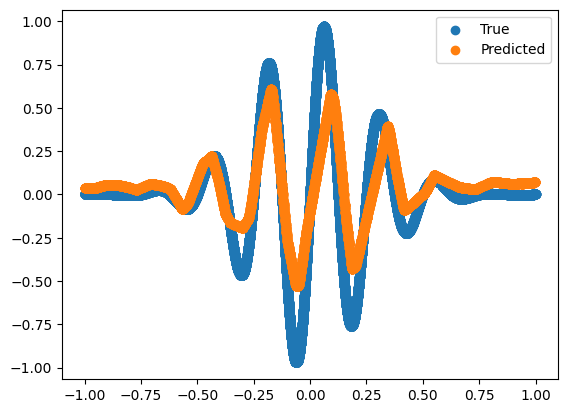

In [83]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.legend()
plt.show()

100%|██████████| 10000/10000 [09:58<00:00, 16.72it/s]


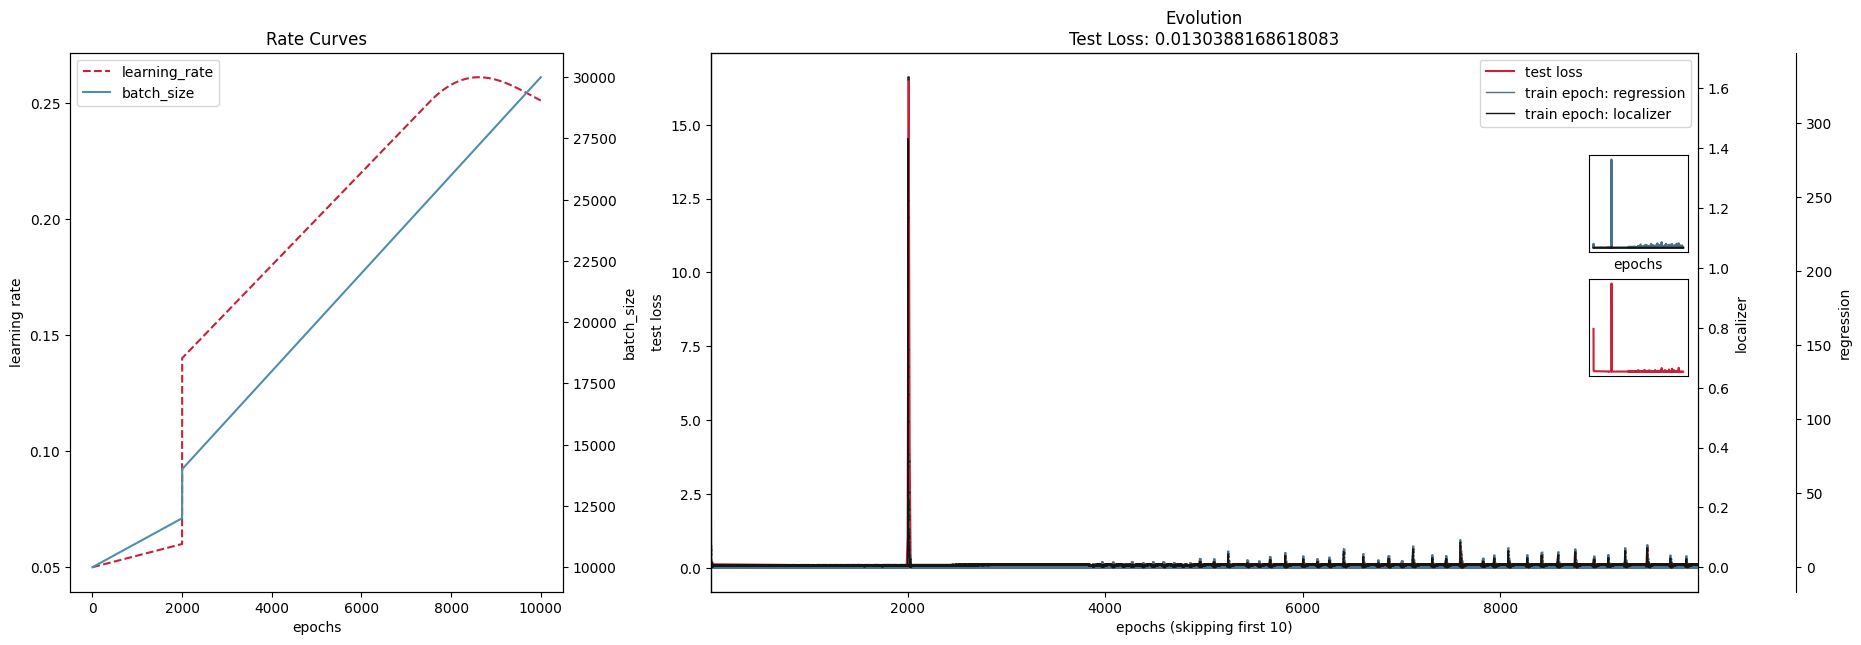

In [85]:
sizes = [1, 200, 200]
delta = np.array([1]*len(sizes))*0.01
k = [0.5]*len(sizes)

act = [torch.nn.ReLU(),lambda x: torch.sin(x)]

net = FL(device, sizes, delta, k, opttype=opt, act = act, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X, test_y, start_batch_size=10000, minibatch=0.5)
ecran(net, test_X, test_y, report, classification=False)

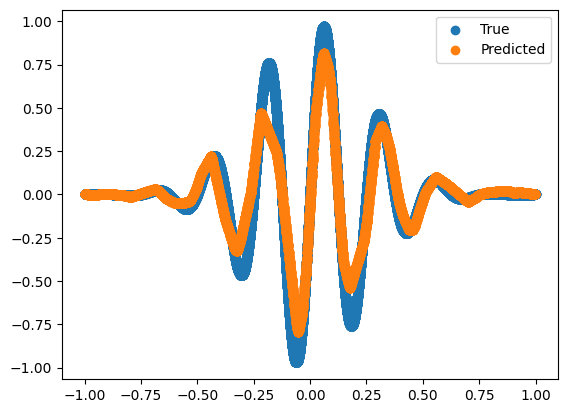

In [86]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.legend()
plt.show()

100%|██████████| 10000/10000 [08:25<00:00, 19.77it/s]


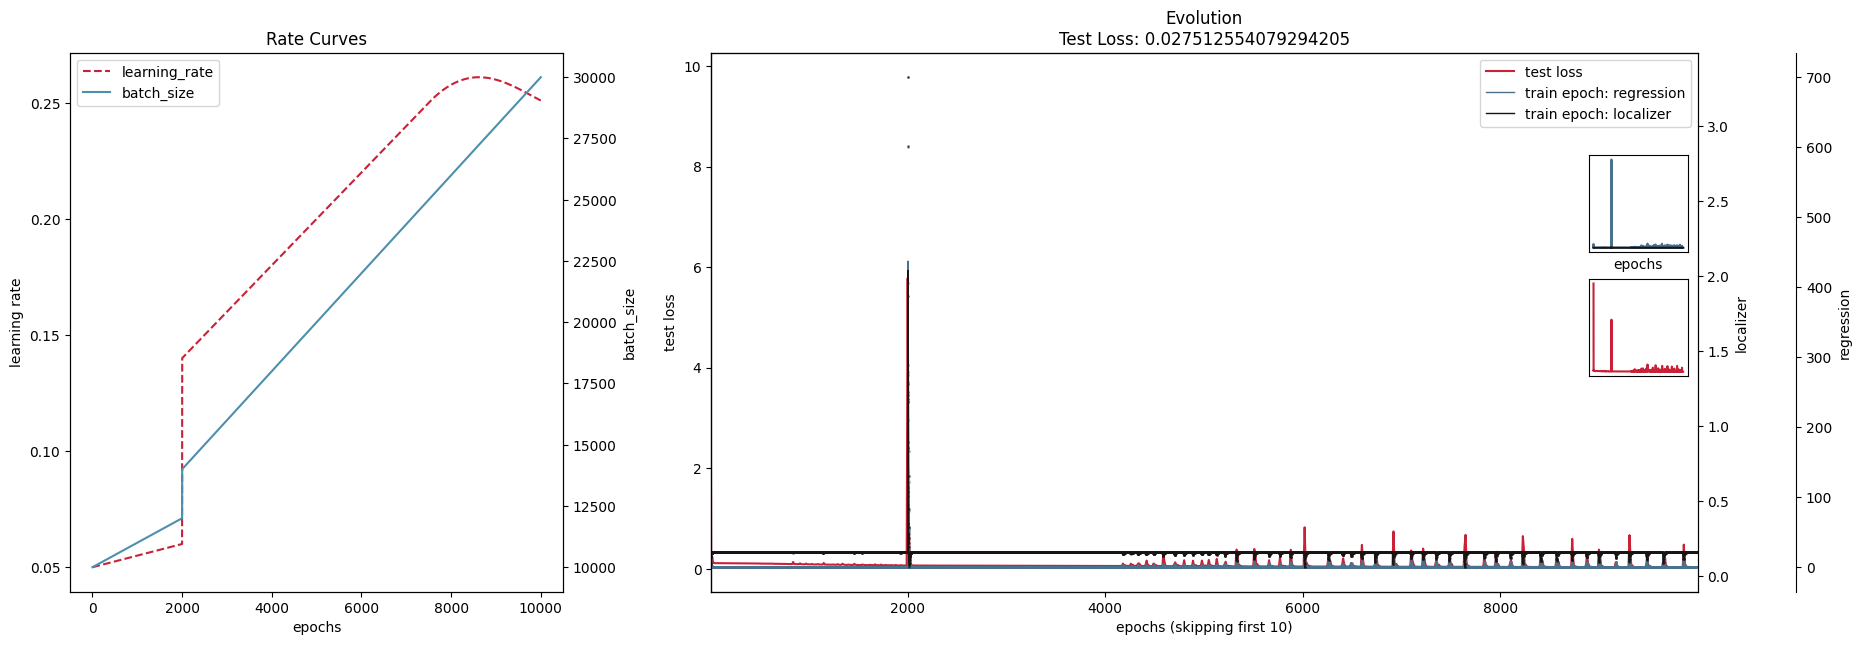

In [17]:
sizes = [1, 200, 200]
delta = np.array([1]*len(sizes))*0.01
k = [8]*len(sizes)
D.epochs=10000
act = [torch.nn.ReLU(),lambda x: torch.sin(x)]

net = FL(device, sizes, delta, k, opttype=opt, act = act, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X, test_y, start_batch_size=10000, minibatch=1.0,)
ecran(net, test_X, test_y, report, classification=False)

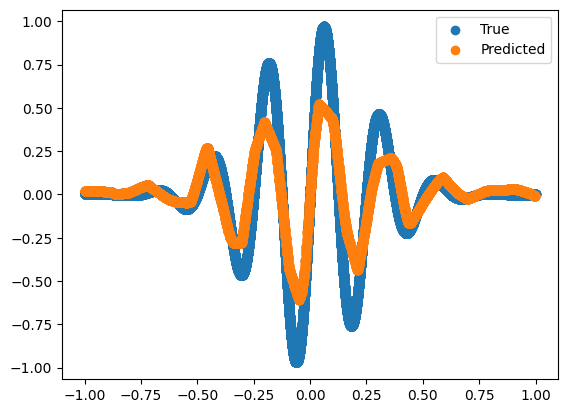

In [19]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.legend()
plt.show()

100%|██████████| 10000/10000 [08:28<00:00, 19.66it/s]


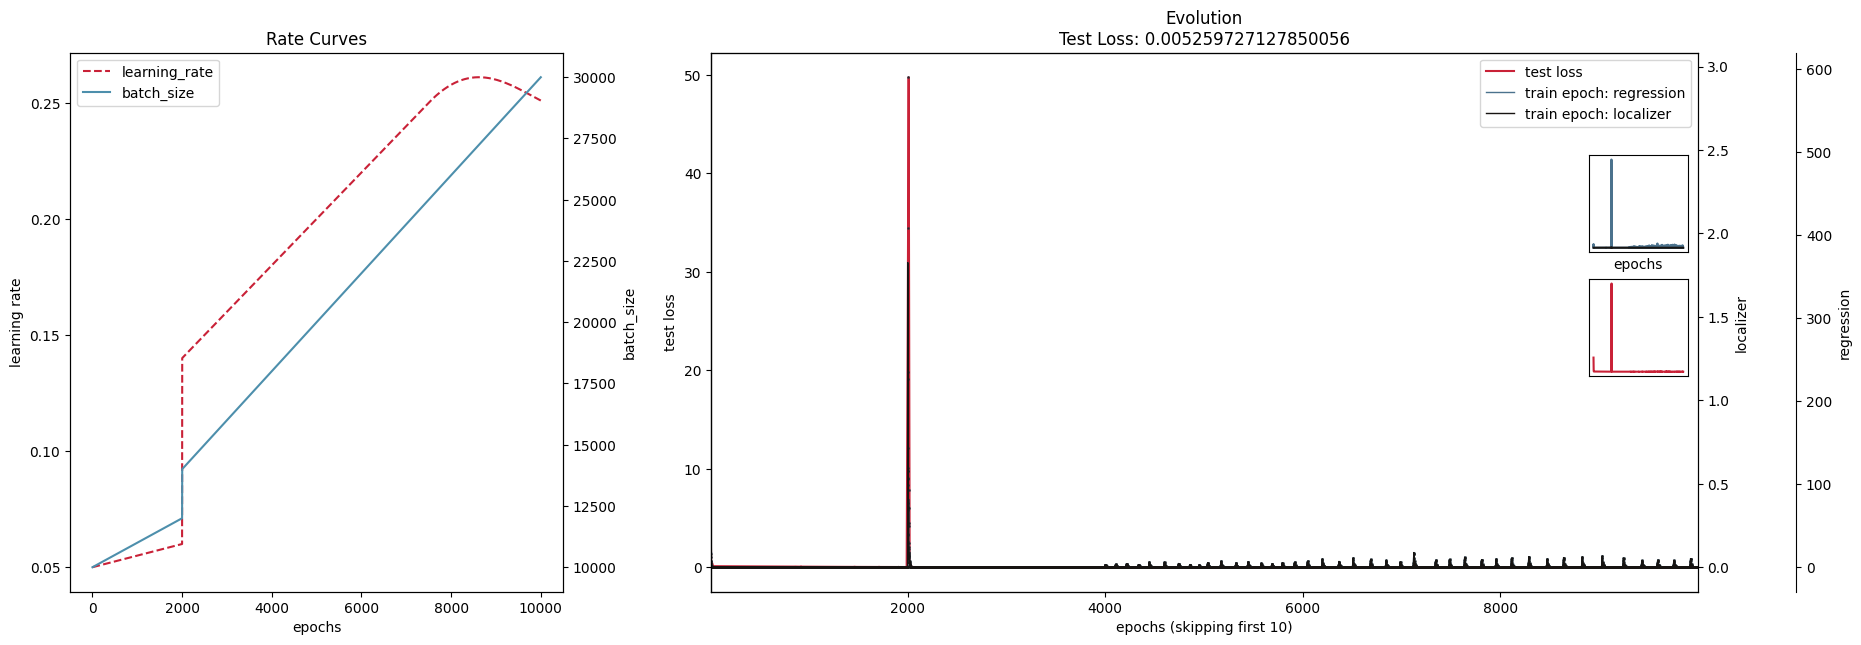

In [20]:
sizes = [1, 200, 200]
delta = np.array([1]*len(sizes))*0.0001
k = [0.5]*len(sizes)
D.epochs=10000
act = [torch.nn.ReLU(),lambda x: torch.sin(x)]

net = FL(device, sizes, delta, k, opttype=opt, act = act, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X, test_y, start_batch_size=10000, minibatch=1.0,)
ecran(net, test_X, test_y, report, classification=False)

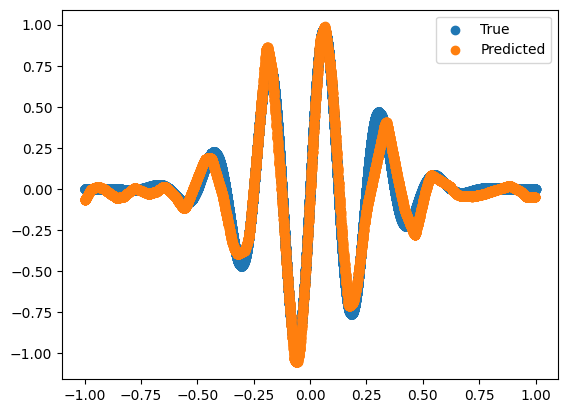

In [21]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.legend()
plt.show()

100%|██████████| 10000/10000 [04:44<00:00, 35.19it/s]


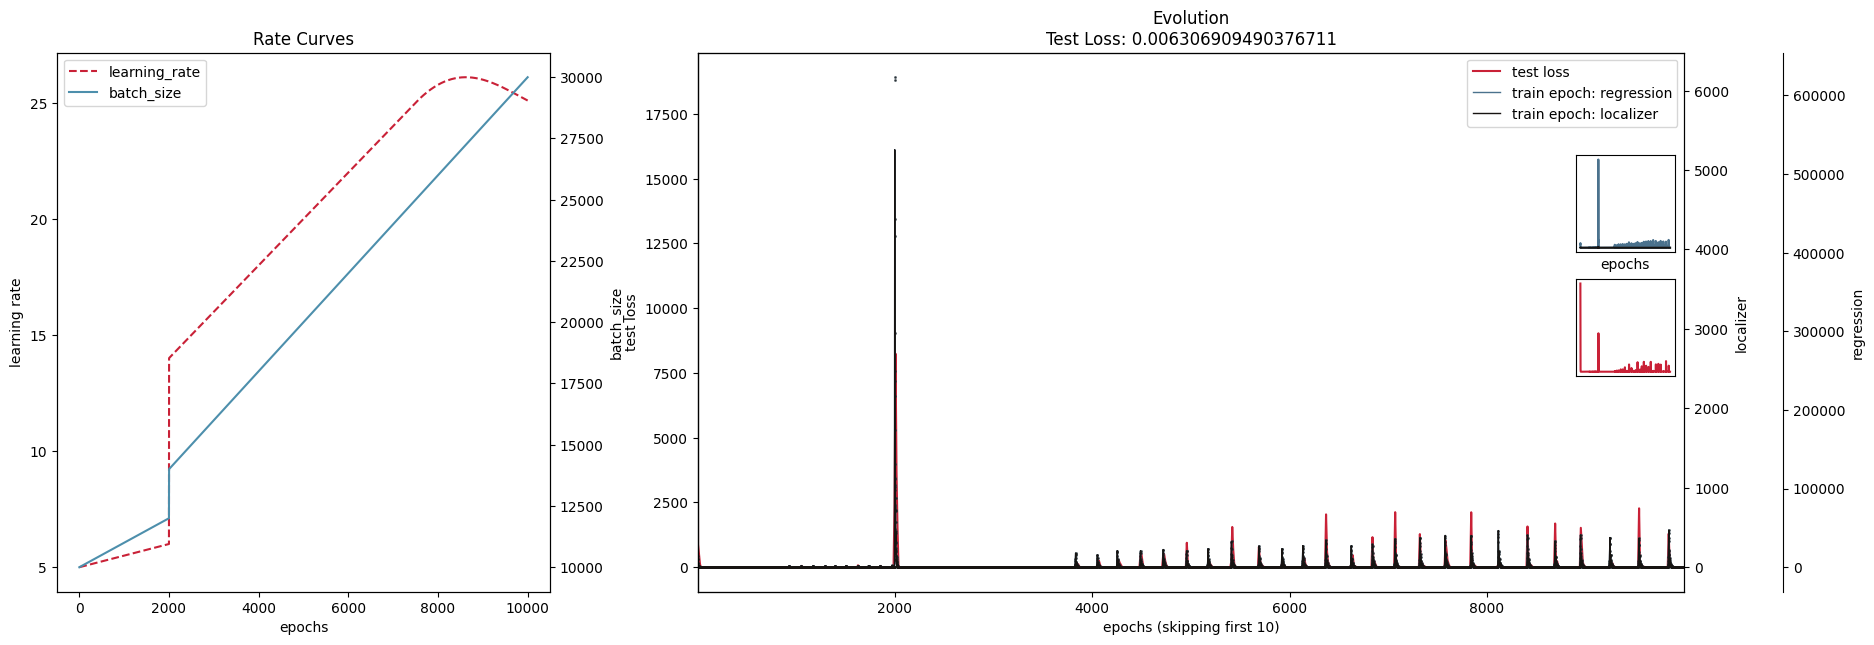

In [26]:
sizes = [1, 100, 100]
delta = np.array([1]*len(sizes))*0.0001
k = [0.9]*len(sizes)
D.epochs=10000
act = [torch.nn.ReLU(),lambda x: torch.sin(x)]
opt = lambda x: optim.Adam(x, lr=0.001) 
net = FL(device, sizes, delta, k, opttype=opt, act = act, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X, test_y, start_batch_size=10000,)
ecran(net, test_X, test_y, report, classification=False)

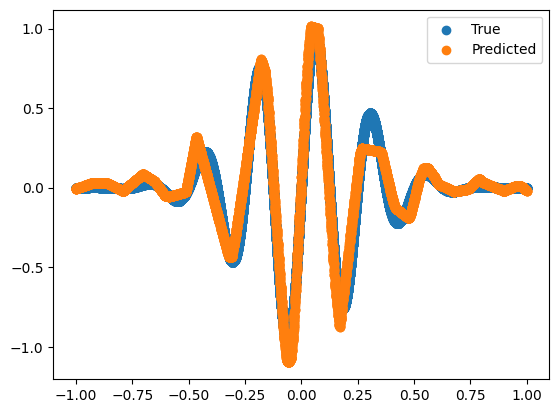

In [27]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.legend()
plt.show()